We are using the bank customer churn dataset from kaggle

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
# from keras.utils import to_categorical
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [3]:
dataset=pd.read_csv('/content/Bank Customer Churn Prediction.csv')
dataset

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
del dataset["customer_id"]
dataset

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
dataset["churn"].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [7]:
dataset.isnull().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [8]:
dataset["country"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [9]:
from sklearn.preprocessing import LabelEncoder
L=LabelEncoder()
dataset["gender"]=L.fit_transform(dataset["gender"])
dataset

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [10]:
data=dataset.drop("churn",axis=1)

In [11]:
Data=pd.get_dummies(data,columns=["country"])
Data

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_France,country_Germany,country_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,1,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,1,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,0,1,0


In [12]:
x=Data.iloc[:,:].values
y=dataset.iloc[:,-1].values
y

array([1, 0, 1, ..., 1, 1, 0])

In [13]:
from imblearn.over_sampling import SMOTE
S=SMOTE()
X_data,y_data=S.fit_resample(x,y)

In [14]:
from collections import Counter
Counter (y_data)

Counter({1: 7963, 0: 7963})

In [15]:
from sklearn.preprocessing import MinMaxScaler
S=MinMaxScaler()
X=S.fit_transform(X_data)
X

array([[0.538     , 0.        , 0.32432432, ..., 1.        , 0.        ,
        0.        ],
       [0.516     , 0.        , 0.31081081, ..., 0.        , 0.        ,
        1.        ],
       [0.304     , 0.        , 0.32432432, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.54904637, 0.        , 0.27550992, ..., 0.        , 1.        ,
        0.        ],
       [0.59662431, 0.91401967, 0.21242712, ..., 0.08598033, 0.        ,
        0.91401967],
       [0.71311424, 0.87012383, 0.37837838, ..., 0.12987617, 0.87012383,
        0.        ]])

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y_data,random_state=250,test_size=0.25)

In [17]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=16, activation='relu'))
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(x_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
374/374 [==============================] - 2s 2ms/step - loss: 0.6462 - accuracy: 0.6239
Epoch 2/100
374/374 [==============================] - 1s 2ms/step - loss: 0.5841 - accuracy: 0.6932
Epoch 3/100
374/374 [==============================] - 1s 2ms/step - loss: 0.5184 - accuracy: 0.7543
Epoch 4/100
374/374 [==============================] - 1s 2ms/step - loss: 0.4661 - accuracy: 0.7899
Epoch 5/100
374/374 [==============================] - 1s 2ms/step - loss: 0.4322 - accuracy: 0.8038
Epoch 6/100
374/374 [==============================] - 1s 2ms/step - loss: 0.4076 - accuracy: 0.8194
Epoch 7/100
374/374 [==============================] - 1s 2ms/step - loss: 0.3888 - accuracy: 0.8273
Epoch 8/100
374/374 [==============================] - 1s 3ms/step - loss: 0.3740 - accuracy: 0.8369
Epoch 9/100
374/374 [==============================] - 1s 3ms/step - loss: 0.3608 - accuracy: 0.8418
Epoch 10/100
374/374 [==============================] - 1s 2ms/step - loss: 0.3508 - accura

In [18]:
y_ann=ann.predict(x_test)
A=[]
for y in y_ann:
    if y>0.5:
        A.append(1)
    else:
        A.append(0)

125/125 [==============================] - 0s 1ms/step


In [19]:
from sklearn.metrics import confusion_matrix
c=confusion_matrix(y_test,A)
print(c)

[[1783  201]
 [ 257 1741]]


In [20]:
from sklearn.metrics import accuracy_score
a=accuracy_score(y_test,A)*100
print("test accuracy",a)

test accuracy 88.49824208940231


<Axes: >

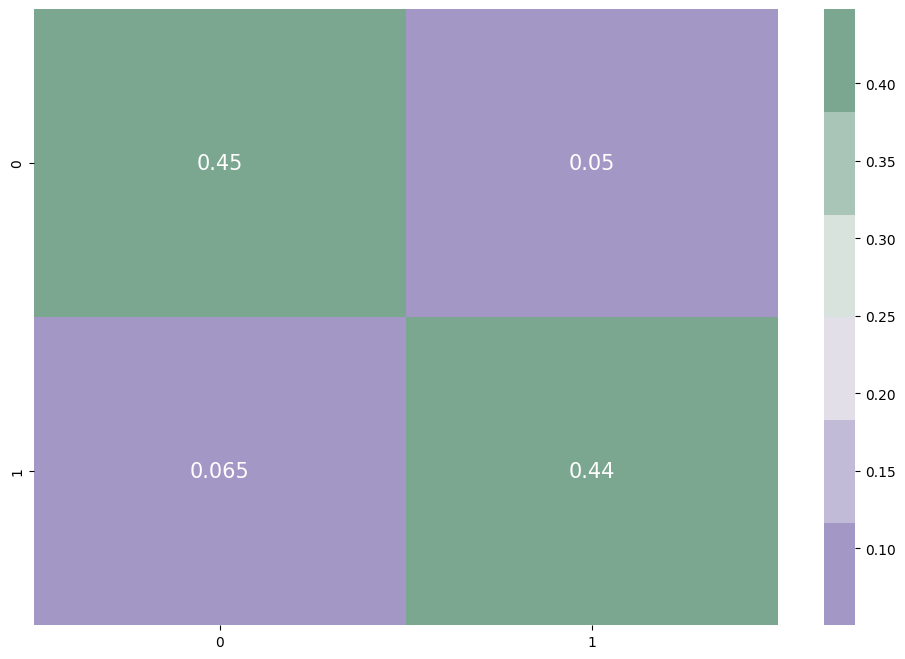

In [21]:
# confusion matrix
cmap1 = sns.diverging_palette(275,150,  s=40, l=65, n=6)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, A)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [22]:
print(classification_report(y_test, A))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89      1984
           1       0.90      0.87      0.88      1998

    accuracy                           0.88      3982
   macro avg       0.89      0.89      0.88      3982
weighted avg       0.89      0.88      0.88      3982

